# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

# since tf version 2 doesn't have a placeholder, we will disable it and use version 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


### Visualizaing Raw Input

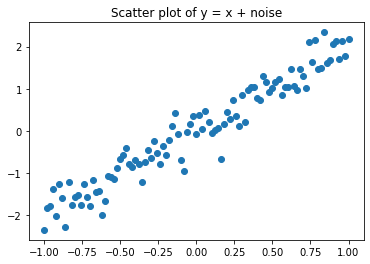

In [2]:
x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.title("Scatter plot of y = x + noise")
plt.scatter(x_train, y_train)
plt.show()

### Solving Linear Regression with Tensorflow

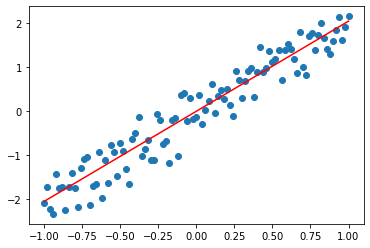

In [3]:
learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    return tf.multiply(X, w)

w = tf.Variable(0.0, name='weights')

y_model = model(X, w)
cost = tf.square(Y-y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epochs in range(training_epochs):
    for x, y in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)
sess.close()

plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()